## Initialize HOME Path

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Install necessary packages

In [2]:
%pip install ultralytics roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.6 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.7 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting un

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.5/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image, display
import yaml
from roboflow import Roboflow
import glob
import matplotlib.pyplot as plt

## Initialize dataset and paths

In [5]:
os.makedirs(f"{HOME}/datasets", exist_ok=True)
%cd {HOME}/datasets

rf = Roboflow(api_key="o7BFDC8TDMsRax8RUnWi")
project = rf.workspace("cardamagedetectionall-vxdcu").project("car-damage-detect-2")
version = project.version(1)
dataset = version.download("yolov8")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.32, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to car-damage-detect-2-1 in yolov8:: 100%|██████████| 7384/7384 [00:01<00:00, 6278.49it/s]


In [6]:
# Update data.yaml file
new_content = {
    'names': [
        'bonnet_dent', 'bumper_dent', 'bumper_scratch', 'car_window_damage', 'crack',
        'door_dent', 'door_scratch', 'front_windscreen_damage', 'headlight_damage',
        'quarter_panel_dent', 'quarter_panel_scratch', 'rear_windscreen_damage',
        'taillight_damage', 'tire_flat', 'trunk_door_dent'
    ],
    'nc': 15,
    'roboflow': {
        'license': 'CC BY 4.0',
        'project': 'car-damage-detect-nttax',
        'url': 'https://universe.roboflow.com/cardamagedetectionall/car-damage-detect-nttax/dataset/1',
        'version': 1,
        'workspace': 'cardamagedetectionall'
    },
    'test': f'{dataset.location}/test/images',
    'train': f'{dataset.location}/train/images',
    'val': f'{dataset.location}/valid/images'
}

file_path = f'{dataset.location}/data.yaml'
with open(file_path, 'r') as file:
    content = yaml.safe_load(file)

content.update(new_content)
with open(file_path, 'w') as file:
    yaml.safe_dump(content, file)

print(f"data.yaml file has been updated successfully at {file_path}.")

data.yaml file has been updated successfully at /kaggle/working/datasets/car-damage-detect-2-1/data.yaml.


In [7]:
%cd {HOME}

/kaggle/working


## 

## Perform hyperparameter tuning

In [ ]:
# Load previous trained model
model = YOLO('/kaggle/input/previous-model/best.pt')

# Perform hyperparameter tuning
model.tune(
    data=f'{dataset.location}/data.yaml', 
    epochs=30, 
    iterations=15, 
    optimizer="AdamW", 
    patience=10,
    plots=False, 
    save=False, 
    val=False
)

Tuner: Initialized Tuner instance with 'tune_dir=runs/segment/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/15 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/input/previous-model/best.pt, data=/kaggle/working/datasets/car-damage-detect-2-1/data.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 40.9MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 6.23M/6.23M [00:00<00:00, 177MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:02<00:00, 1016.37it/s]


train: New cache created: /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<00:00, 815.64it/s] 


val: New cache created: /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.43G      1.493      2.947      2.235      1.681          9        640: 100%|██████████| 185/185 [01:29<00:00,  2.06it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.39G      2.037      3.914      3.654      2.209         15        640: 100%|██████████| 185/185 [01:26<00:00,  2.14it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.63G      1.988      3.867      3.621      2.166          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.39G      1.907      3.693      3.411      2.077         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.66G      1.826      3.579      3.268      2.013         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.25G      1.741      3.486      3.086      1.907         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.38G       1.69      3.369      2.948      1.873         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.38G      1.654      3.308      2.858      1.833         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.43G      1.642      3.263      2.801      1.813          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.38G       1.61      3.214      2.718      1.786         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.38G      1.601      3.156      2.691      1.776         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.39G      1.567       3.14      2.619      1.736         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.42G      1.561      3.106      2.582      1.742         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.38G      1.509      2.997      2.498      1.691         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.37G      1.508      3.031      2.463      1.691         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.39G      1.494       3.01      2.442      1.688         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.67G      1.469      2.942       2.32      1.656         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.38G      1.442      2.888      2.294      1.637         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.61G      1.437      2.857      2.252      1.629         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.39G      1.431      2.849      2.212      1.625         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.43G      1.479      2.916      2.169      1.825          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.41G      1.451      2.819       2.05      1.805          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.4G       1.42      2.775      1.964      1.771          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.379      2.714      1.904      1.728          8        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.44G      1.349      2.674      1.831      1.707          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.42G      1.328      2.625      1.761      1.682          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.41G      1.286      2.552      1.687      1.643          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G       1.26        2.5      1.627      1.617          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.44G      1.233      2.472      1.583      1.604          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.42G      1.212       2.45      1.522      1.579          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]


                   all        369        481      0.618      0.481      0.523      0.337      0.582      0.481      0.502      0.289

30 epochs completed in 0.695 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.9MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]


                   all        369        481      0.616      0.481      0.522      0.337      0.594      0.477      0.502       0.29
           bonnet_dent         25         36      0.718      0.444      0.525      0.256      0.665      0.444      0.498      0.198
           bumper_dent         19         21      0.694      0.325      0.349      0.206        0.7      0.333      0.355      0.197
        bumper_scratch         25         32      0.225     0.0625      0.177      0.113      0.213     0.0625      0.173     0.0764
     car_window_damage         32         32      0.776      0.906      0.956      0.743      0.787      0.925      0.958      0.747
                 crack         20         27      0.412      0.208      0.228      0.104      0.425      0.219      0.208     0.0356
             door_dent         34         40      0.809      0.325      0.445      0.224      0.708        0.3      0.382       0.16
          door_scratch         35         53      0.513      0.283   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01127, momentum=0.94329) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00052), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.42G       1.46       2.83      2.401      1.565          9        640: 100%|██████████| 185/185 [01:28<00:00,  2.09it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.43G        1.9      3.626      3.647      1.962         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.63G      1.859      3.572      3.599       1.93          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.39G      1.812      3.445      3.436      1.879         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.66G      1.724      3.306      3.253      1.805         11        640: 100%|██████████| 185/185 [01:24<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.38G      1.645      3.241      3.101      1.727         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.38G      1.587      3.119      2.927      1.683         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.39G      1.548      3.065      2.862      1.645         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.42G      1.534      3.035      2.809      1.628          9        640: 100%|██████████| 185/185 [01:24<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30       5.4G      1.534      3.022      2.754      1.627         17        640: 100%|██████████| 185/185 [01:24<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.38G      1.516      2.976      2.724      1.598         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.64G      1.475       2.93       2.61      1.571         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.42G      1.451      2.867      2.537       1.55         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.39G      1.432      2.822      2.494      1.539         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.38G      1.422      2.844      2.459      1.528         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30       5.4G      1.425      2.839      2.463      1.538         15        640: 100%|██████████| 185/185 [01:24<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.66G      1.393      2.781       2.35      1.499         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.38G      1.365       2.72      2.285      1.475         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.61G      1.338      2.686      2.241      1.461         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.39G      1.339      2.684      2.236      1.462         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.44G      1.401      2.733      2.176      1.646          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.41G      1.372      2.643      2.059      1.636          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.4G      1.336      2.578      1.947      1.599          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.289      2.553      1.891      1.563          8        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.41G      1.246      2.446      1.762       1.52          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30       5.4G      1.203      2.392      1.701      1.485          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G      1.186      2.345      1.647      1.466          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.44G      1.161      2.312      1.556      1.448          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.42G      1.146      2.277       1.52       1.43          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]


                   all        369        481      0.575       0.52       0.54      0.345      0.627      0.484      0.508      0.301

30 epochs completed in 0.695 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 23.9MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]


                   all        369        481      0.575       0.52       0.54      0.345      0.633      0.484      0.507      0.301
           bonnet_dent         25         36      0.602      0.417      0.549      0.293      0.706        0.4      0.516      0.222
           bumper_dent         19         21      0.399      0.286      0.294      0.203      0.456      0.286       0.31      0.166
        bumper_scratch         25         32      0.535      0.219      0.262       0.17      0.702      0.125      0.261      0.138
     car_window_damage         32         32      0.804      0.938      0.954      0.755      0.881      0.929      0.954      0.729
                 crack         20         27      0.395      0.148      0.209     0.0801      0.609      0.185      0.212     0.0454
             door_dent         34         40      0.573      0.425      0.461       0.26      0.602      0.375      0.405      0.185
          door_scratch         35         53      0.498      0.264   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.00963, momentum=0.94329) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00054), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.42G       1.59      3.089      2.475      1.533         13        640: 100%|██████████| 185/185 [01:28<00:00,  2.10it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.43G      2.111      4.011      3.863      1.963         17        640: 100%|██████████| 185/185 [01:26<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.39G       2.09      3.989      3.881      1.936          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.39G      2.005      3.825      3.643       1.87         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30       5.4G      1.924      3.708      3.528      1.817         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.64G       1.88      3.594      3.352      1.761         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30       5.4G      1.793      3.491      3.241       1.71          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.63G      1.745      3.443      3.137      1.673         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.41G      1.742      3.411      3.015      1.649         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.41G      1.693      3.352      2.919      1.627         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.39G      1.673      3.286      2.864      1.591         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.39G      1.653      3.286       2.85      1.585         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.41G      1.619      3.175      2.719      1.559         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.39G      1.595      3.136      2.651      1.544         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.38G      1.577      3.142      2.624       1.53         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.39G      1.565      3.106      2.553      1.516         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.41G      1.543      3.084      2.544        1.5         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.41G      1.525      3.019       2.49      1.489         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.39G      1.504      2.952      2.395      1.477         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.39G      1.508      2.947      2.364      1.474         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.43G      1.546       2.98      2.269      1.626          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.37it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.41G      1.485      2.852      2.089      1.603          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.4G      1.453      2.796      2.036      1.577          6        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.414      2.766      1.947      1.546          8        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.43G      1.385      2.704      1.882      1.524          7        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.42G      1.357      2.633      1.769      1.497          6        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.41G      1.305      2.564      1.707      1.457          6        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G      1.276      2.492      1.627      1.434          7        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.43G       1.25      2.464      1.565      1.416          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.42G      1.237      2.444      1.525      1.406          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]


                   all        369        481      0.557      0.558      0.566       0.36      0.541      0.541      0.531       0.31

30 epochs completed in 0.698 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 23.9MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]


                   all        369        481      0.556       0.56      0.566       0.36      0.541      0.541      0.532       0.31
           bonnet_dent         25         36      0.458      0.422      0.522      0.301      0.526      0.472      0.534      0.253
           bumper_dent         19         21      0.439      0.286       0.29      0.183      0.442      0.286      0.287      0.156
        bumper_scratch         25         32      0.315      0.202      0.232      0.158      0.294      0.183      0.224      0.119
     car_window_damage         32         32      0.833      0.906      0.966      0.772      0.834      0.906      0.966      0.765
                 crack         20         27      0.448      0.296      0.405      0.159      0.475      0.296      0.276     0.0866
             door_dent         34         40      0.471      0.356      0.438      0.232      0.434      0.325       0.37      0.149
          door_scratch         35         53      0.459      0.434   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01299, momentum=0.91189) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00059), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.42G      1.531      3.012      3.401      1.932         14        640: 100%|██████████| 185/185 [01:28<00:00,  2.09it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.39G      1.903        3.6      4.601      2.344         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30       5.4G       1.74      3.454      4.525      2.194          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.39G      1.694      3.344      4.125      2.125         14        640: 100%|██████████| 185/185 [01:26<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.42G      1.633      3.246      3.932      2.063         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30       5.4G      1.584      3.163      3.779      2.001         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30       5.4G      1.527      3.054      3.606      1.932         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30       5.4G      1.515      3.028      3.544      1.929         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.42G      1.492      2.999      3.485      1.902         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.39G      1.486      2.957      3.458      1.901         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.38G      1.423      2.883      3.305      1.843         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.63G      1.428      2.867      3.262       1.83         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.42G      1.405      2.834      3.192      1.805         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.39G      1.383       2.79       3.07      1.798         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.37G      1.354      2.749      3.046      1.768         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.39G      1.368      2.734      3.008      1.761         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.42G      1.319      2.648      2.925      1.739         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30       5.4G      1.313       2.68      2.916      1.721         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30       5.4G      1.286      2.588      2.764      1.697         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30       5.4G      1.277      2.612      2.723      1.677          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.44G      1.377      2.699      2.703      1.947          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.38it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.42G      1.327      2.623      2.558      1.909          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.39G      1.308      2.594      2.488      1.878          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.265       2.55      2.396      1.846          8        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.44G      1.238      2.503      2.311      1.812          7        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.42G      1.226      2.454      2.216      1.789          6        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.42G      1.203      2.415      2.174      1.762          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G      1.176      2.362      2.091      1.732          7        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.44G      1.156       2.35          2      1.717          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.41G      1.146      2.322      1.994      1.705          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]


                   all        369        481      0.471      0.513      0.499      0.306      0.451      0.489      0.457      0.263

30 epochs completed in 0.700 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 23.9MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]


                   all        369        481       0.47      0.514      0.499      0.306      0.451      0.486      0.458      0.264
           bonnet_dent         25         36      0.337      0.361      0.425      0.198       0.34      0.361      0.366      0.144
           bumper_dent         19         21      0.386       0.19      0.249       0.14      0.392       0.19      0.247       0.12
        bumper_scratch         25         32      0.339     0.0644      0.149     0.0972      0.354     0.0625      0.138     0.0606
     car_window_damage         32         32      0.764      0.906      0.948      0.708      0.767      0.906      0.953      0.717
                 crack         20         27      0.298      0.252      0.218     0.0901      0.234      0.193      0.106     0.0331
             door_dent         34         40      0.352      0.425      0.469      0.255      0.343        0.4      0.391       0.16
          door_scratch         35         53      0.415      0.302   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01059, momentum=0.93388) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00047), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.42G       1.51      2.936      2.486      1.688          9        640: 100%|██████████| 185/185 [01:28<00:00,  2.08it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.39G      2.023      3.842      3.925      2.174         15        640: 100%|██████████| 185/185 [01:26<00:00,  2.13it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.63G      1.951      3.765      3.794      2.109          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.39G      1.877      3.613      3.618       2.04         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.66G      1.806      3.483      3.473       1.98         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.38G      1.735      3.445       3.33      1.904         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.38G      1.701      3.353      3.166      1.866         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.39G      1.644      3.248      3.063      1.805         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.42G      1.626      3.204      2.981      1.782          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.39G      1.593      3.144      2.875      1.761         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.37G      1.588      3.117      2.854      1.747         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.64G      1.536      3.055      2.758      1.708         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.42G      1.538      3.054       2.73      1.706         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.38G      1.534      2.971      2.691      1.689         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.36G      1.498       3.02      2.638      1.685         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.39G      1.488      2.999      2.607      1.671         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.42G      1.463      2.903      2.469      1.638         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.39G      1.443      2.858      2.439       1.62         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.61G      1.412      2.808      2.379      1.601         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.39G      1.406      2.805       2.35      1.596         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.44G      1.475      2.863      2.309      1.809          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.39it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.41G      1.429      2.765      2.143      1.772          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.41G      1.403      2.708       2.07       1.75          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.349      2.677      1.992      1.701          8        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.44G      1.326      2.629      1.909       1.68          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.41G      1.307      2.566      1.844      1.656          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.41G      1.265      2.509       1.77      1.616          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G       1.24      2.458      1.704      1.594          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.44G       1.21      2.421      1.616      1.574          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.41G      1.189      2.394       1.59      1.552          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]


                   all        369        481      0.584      0.533      0.529      0.335      0.527      0.529      0.495      0.293

30 epochs completed in 0.698 hours.
Optimizer stripped from runs/segment/train5/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train5/weights/best.pt, 23.9MB

Validating runs/segment/train5/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]


                   all        369        481      0.584      0.534       0.53      0.336      0.529      0.529      0.495      0.294
           bonnet_dent         25         36      0.628      0.472      0.493      0.261       0.55      0.472      0.487      0.215
           bumper_dent         19         21      0.469      0.286      0.266      0.161      0.442      0.286      0.273       0.14
        bumper_scratch         25         32      0.621      0.156      0.223       0.15      0.435      0.169      0.217      0.103
     car_window_damage         32         32      0.769      0.969      0.981      0.739      0.759      0.969      0.977      0.744
                 crack         20         27      0.433      0.339       0.28      0.131      0.311      0.259      0.191      0.065
             door_dent         34         40      0.472       0.35      0.383      0.221      0.428      0.375      0.333      0.133
          door_scratch         35         53      0.425      0.358   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01272, momentum=0.98) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00059), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.47G      1.525      3.044      2.568      1.727         10        640: 100%|██████████| 185/185 [01:28<00:00,  2.09it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.39G      1.883      3.603      3.492      2.062         16        640: 100%|██████████| 185/185 [01:26<00:00,  2.14it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.66G      1.813      3.566      3.508      2.054          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30       5.4G      1.773       3.44      3.305      1.984         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.63G      1.741      3.355      3.155      1.944         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.44G      1.684      3.303      3.119      1.882         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30       5.4G      1.614      3.172      2.893      1.814         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.39G      1.606      3.128      2.887      1.804         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.39G      1.583      3.119      2.798      1.779          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.44G      1.551       3.05      2.688       1.74         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30       5.4G      1.535      3.003      2.671      1.725         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.39G      1.495      2.963      2.628      1.692         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.39G      1.488      2.927      2.544      1.679         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.42G      1.491       2.87      2.512      1.673         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30       5.4G      1.452      2.914      2.489      1.655         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30       5.4G       1.43      2.878      2.447      1.639         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.63G      1.434      2.833      2.383      1.623         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.44G      1.416       2.79      2.377      1.617         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.64G      1.408      2.763      2.306      1.595         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.39G      1.389      2.768        2.3      1.599         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.41G      1.457       2.85      2.288      1.821          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.46G      1.413      2.744      2.133      1.799          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.43it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.42G      1.391      2.691      2.052      1.763          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.41G      1.329      2.633      1.975      1.717          8        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.41G      1.331      2.616      1.913      1.717          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.46G      1.277      2.537      1.834      1.672          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.42G      1.261       2.51      1.793      1.641          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.41G      1.234      2.444      1.734      1.616          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.41G      1.214      2.433      1.668      1.603          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.46G      1.203      2.415      1.624      1.578          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]


                   all        369        481      0.616      0.506      0.523      0.324      0.606      0.493      0.501       0.29

30 epochs completed in 0.696 hours.
Optimizer stripped from runs/segment/train6/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train6/weights/best.pt, 23.9MB

Validating runs/segment/train6/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]


                   all        369        481      0.618      0.506      0.523      0.324      0.605      0.493      0.502      0.291
           bonnet_dent         25         36      0.485      0.361      0.431      0.223      0.489      0.361      0.404      0.183
           bumper_dent         19         21      0.461      0.238      0.258      0.164      0.462      0.238      0.266      0.149
        bumper_scratch         25         32          1      0.177      0.321      0.191          1      0.175      0.308      0.143
     car_window_damage         32         32      0.884      0.969      0.969      0.742      0.885      0.965      0.969      0.733
                 crack         20         27      0.364      0.222      0.263     0.0851      0.312      0.185      0.237     0.0589
             door_dent         34         40      0.592        0.4      0.429      0.225      0.602        0.4      0.407      0.166
          door_scratch         35         53      0.457      0.245   

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


optimizer: AdamW(lr=0.01038, momentum=0.94329) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0006), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train7
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.42G      1.527      3.029       3.29      1.458          9        640: 100%|██████████| 185/185 [01:28<00:00,  2.10it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.39G       2.07      3.961      5.157      1.878         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.62G      2.001      3.862      5.065      1.836          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.41G      1.906      3.658      4.683      1.752         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.61G      1.846      3.535      4.492      1.702          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.38G      1.779      3.505      4.323      1.638         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.39G      1.742      3.413      4.123      1.609         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.42G      1.688      3.327       4.01      1.571         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.39G      1.684      3.328      3.931      1.558          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.33G      1.646      3.242      3.784      1.538         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.38G      1.606       3.17      3.653      1.504         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.43G      1.576      3.132      3.618      1.493         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.37G      1.555      3.085      3.482       1.47         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.45G      1.544      3.021      3.464       1.46         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      5.38G      1.538      3.076      3.451      1.456         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.42G      1.522      3.064      3.411      1.449         14        640: 100%|██████████| 185/185 [01:24<00:00,  2.18it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.36G      1.504      2.983      3.212      1.417         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.45G      1.472      2.914       3.16      1.398         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.38G      1.444      2.885      3.098      1.396         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.42G      1.432      2.876      3.021      1.377         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.39G      1.529      2.975      2.963      1.576          5        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.31G      1.478       2.83      2.773      1.551          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30       5.4G      1.426      2.779      2.631      1.513          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.44G      1.396      2.707      2.518      1.483          8        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.42G       1.37      2.676      2.405      1.469          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.42it/s]



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.41G      1.358      2.652      2.358      1.452         21        640:  42%|████▏     | 77/185 [00:31<00:45,  2.38it/s]

## Define best hyperparameters

In [21]:
import yaml

# Load the YAML file
file_path = '/kaggle/working/runs/segment/tune/best_hyperparameters.yaml'

with open(file_path, 'r') as file:
    best_hyperparams = yaml.safe_load(file)

best_hyperparams

{'lr0': 0.00963,
 'lrf': 0.00933,
 'momentum': 0.94329,
 'weight_decay': 0.00054,
 'warmup_epochs': 3.08613,
 'warmup_momentum': 0.8,
 'box': 7.90544,
 'cls': 0.55973,
 'dfl': 1.36294,
 'hsv_h': 0.0147,
 'hsv_s': 0.68419,
 'hsv_v': 0.37866,
 'degrees': 0.0,
 'translate': 0.09538,
 'scale': 0.45888,
 'shear': 0.0,
 'perspective': 0.0,
 'flipud': 0.0,
 'fliplr': 0.5438,
 'bgr': 0.0,
 'mosaic': 0.9249,
 'mixup': 0.0,
 'copy_paste': 0.0}

## Training Previous Trained Model with Best Hyperparams

In [9]:
# Load previous trained model
model = YOLO('/kaggle/input/previous-model/best.pt')

# Train the model with the specified hyperparameters
model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=200,
    **best_hyperparams
)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=/kaggle/input/previous-model/best.pt, data=/kaggle/working/datasets/car-damage-detect-2-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

2024-06-16 09:56:37,018	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-16 09:56:37,487	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

train: Scanning /kaggle/working/datasets/car-damage-detect-2-1/train/labels.cache... 2949 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2949/2949 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]


Plotting labels to runs/segment/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00894' and 'momentum=0.9307' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.00046), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train9
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.39G        0.5      0.991     0.6286     0.9951         11        640: 100%|██████████| 185/185 [01:29<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.674      0.598      0.613      0.423      0.638      0.571      0.569      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.43G       0.56      1.086     0.7221       1.03         18        640: 100%|██████████| 185/185 [01:26<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.667      0.598      0.588      0.414      0.654      0.588      0.569      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.38G      0.599      1.167     0.8107      1.056         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        369        481       0.61      0.601      0.575      0.391      0.599      0.572      0.551      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      5.39G     0.6248      1.212     0.8732      1.086         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]

                   all        369        481      0.592      0.569      0.567      0.392      0.572      0.557       0.54      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.64G      0.617      1.199      0.857      1.082         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.632      0.574      0.586      0.386      0.608      0.553      0.558      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.34G     0.6312      1.246     0.8888      1.085         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.567      0.608      0.572      0.389       0.63      0.539       0.55      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.45G      0.628       1.23     0.8773      1.087         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.614      0.567      0.565      0.374      0.598      0.559      0.533      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.41G     0.6222      1.205     0.8525      1.077         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.589      0.572      0.562      0.372      0.613      0.537      0.542      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.42G     0.6238      1.239      0.887      1.082          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.627        0.6      0.575       0.38      0.621      0.554      0.538      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.37G     0.6343      1.227     0.8797      1.087         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.626      0.614      0.594      0.396      0.586      0.572      0.553      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.42G     0.6366      1.218      0.905      1.092         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481      0.639      0.604      0.596       0.41      0.635      0.576      0.564      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.64G     0.6361      1.241     0.8715      1.095         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.638      0.546      0.565      0.369      0.645      0.514      0.536      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.41G     0.6312      1.223     0.8759      1.088         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        369        481       0.63      0.551      0.567      0.376      0.621      0.529      0.538      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.39G     0.6385      1.233     0.8957      1.096         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481       0.65      0.546      0.582      0.387       0.63      0.541      0.554      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.42G     0.6343      1.226     0.8685       1.09         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        369        481      0.631      0.593      0.587      0.392      0.606      0.579      0.556      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.41G     0.6353      1.236     0.8807      1.093         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]

                   all        369        481      0.592      0.622      0.594      0.396      0.572      0.592       0.56      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.67G     0.6302       1.22     0.8526      1.077         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.687      0.549      0.587      0.403      0.678      0.543      0.573      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.38G     0.6323      1.225       0.85      1.085         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481      0.643      0.579      0.582      0.389      0.651      0.557      0.557      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.43G     0.6262      1.199     0.8419      1.079         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481       0.65      0.592      0.603      0.404      0.635       0.57      0.578      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.39G     0.6167      1.192     0.8554      1.077         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        369        481      0.629        0.6      0.599      0.401      0.659      0.549      0.569      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.38G     0.6166        1.2     0.8475      1.074         10        640: 100%|██████████| 185/185 [01:26<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.583      0.598      0.575      0.391      0.567       0.58       0.55      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.38G      0.629      1.223     0.8525      1.078         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.654       0.59      0.588      0.401      0.642      0.576      0.555      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.41G     0.6077      1.201     0.8101      1.067         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481        0.7      0.546      0.584      0.393      0.685      0.535      0.562      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200       5.4G     0.6051      1.185     0.7931      1.068         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.679      0.567      0.587      0.398      0.637      0.569      0.565      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200       5.4G     0.6143      1.171     0.8198      1.068         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.653      0.574      0.575      0.392       0.64       0.56      0.551      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.38G     0.6173      1.204     0.8157      1.072         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.624      0.626      0.587      0.392      0.606      0.608      0.563      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.41G     0.6091      1.193     0.8219      1.073         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.611      0.617      0.588      0.403      0.603      0.608      0.569      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.39G     0.6109      1.192     0.8219      1.073         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]

                   all        369        481      0.637        0.6      0.592      0.397      0.653      0.571      0.569      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.37G     0.6119      1.189     0.8228      1.071         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]

                   all        369        481      0.653      0.605      0.609      0.411      0.646      0.599      0.592      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.39G     0.6033      1.183     0.7911      1.064         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481       0.63      0.631      0.599      0.405      0.625      0.602       0.57      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.43G     0.6091      1.162     0.7956      1.064         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.617      0.614      0.588        0.4      0.626      0.562      0.563      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.41G     0.5965      1.148     0.7853      1.059          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.647      0.571      0.589      0.397      0.631      0.545      0.552      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.41G      0.611       1.17     0.8023      1.067         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.633      0.578      0.583      0.402      0.622      0.569      0.558      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.38G     0.6025      1.169      0.803      1.059         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.691      0.583      0.606      0.415       0.68      0.575      0.588      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.42G     0.5896      1.139     0.7697      1.052         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.665      0.571      0.604      0.409      0.658       0.55      0.569      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200       5.4G     0.5972      1.158     0.7995      1.062         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.616      0.603      0.583      0.399      0.606      0.586      0.558      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200       5.4G     0.5958       1.16     0.7811      1.057         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.653      0.573      0.586      0.405      0.639      0.559      0.561       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.33G     0.5875      1.151      0.759      1.049         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.641      0.576      0.572      0.398      0.629      0.561      0.553       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.42G      0.589      1.163     0.7697      1.057         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481       0.63      0.624      0.587      0.401      0.605      0.599      0.554      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200       5.4G     0.5867      1.156     0.7604      1.052         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.632      0.576       0.58      0.394      0.603      0.557      0.553      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.63G      0.586      1.127     0.7536      1.048         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.665        0.6      0.598      0.408       0.64      0.572      0.564      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.39G     0.5925      1.142     0.7536      1.056         21        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.692      0.563      0.596       0.41      0.679      0.553      0.579      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.66G     0.5749      1.124     0.7447      1.045          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.637      0.568      0.581      0.389      0.609      0.548      0.549      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.39G     0.5824      1.142     0.7371      1.042         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.644      0.615      0.616      0.418      0.632      0.582      0.575      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.63G     0.5733      1.112      0.744      1.047         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.625      0.636      0.618      0.416      0.598      0.611      0.574      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.38G     0.5827      1.131     0.7577       1.05         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.611      0.619      0.591      0.399      0.611      0.576      0.554       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.41G     0.5731      1.103      0.715      1.037         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.695      0.583       0.61      0.415      0.683      0.572      0.582      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200       5.4G     0.5748      1.114      0.744      1.045         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.646      0.567      0.577      0.398      0.637      0.553      0.553      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.39G     0.5639      1.098     0.7146      1.035         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.652      0.627      0.608      0.422      0.633      0.607      0.587      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.38G     0.5705      1.136     0.7257      1.035         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.644      0.591      0.574      0.395      0.629      0.554      0.537      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.43G     0.5646      1.116     0.7141      1.033         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.652      0.603       0.59      0.401      0.619      0.581      0.556      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200       5.4G     0.5665      1.108     0.7164      1.034         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481        0.7       0.57      0.591      0.413      0.623      0.586      0.567      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.39G     0.5611      1.091     0.7085      1.031         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.631      0.606        0.6      0.403      0.613      0.588       0.57      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.39G      0.555      1.066     0.6844      1.022         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.632       0.61      0.594      0.409      0.612      0.599      0.567      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.43G     0.5686      1.099     0.7197      1.034         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.666      0.592      0.591      0.412      0.649      0.578      0.566      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.41G      0.559      1.076     0.6967      1.028         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.676      0.623      0.605      0.409      0.652      0.603      0.574      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.41G     0.5683      1.099     0.7084      1.029          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.612      0.627      0.597      0.414      0.663       0.56      0.574      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.39G     0.5574      1.084     0.7021      1.032         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.633      0.604      0.599      0.415      0.619      0.592      0.575      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.43G     0.5553      1.091     0.6999      1.031         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.638      0.598      0.592      0.417      0.613      0.569      0.562      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.41G     0.5542      1.077     0.6959      1.021         22        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.675      0.577      0.592      0.408      0.661      0.566      0.568      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.41G     0.5555      1.077     0.6922      1.024         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.622      0.595      0.583      0.409       0.61      0.549      0.544      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.62G     0.5512      1.076     0.6881      1.028          7        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.659      0.597      0.585      0.405      0.632      0.571      0.543      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.43G       0.55      1.074     0.6877      1.024         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.646      0.582      0.579      0.405      0.623      0.565       0.55       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.41G     0.5562       1.08     0.6811      1.031         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.655      0.599      0.593      0.406      0.647      0.569      0.558      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.39G     0.5489      1.067     0.6782      1.027         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.609      0.629       0.59      0.408      0.604      0.586      0.556      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.34G     0.5496      1.096     0.6837      1.022         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.643      0.611      0.596      0.404      0.621      0.592       0.56      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.44G     0.5432       1.05     0.6662       1.02         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.667      0.593      0.588      0.411      0.638      0.572      0.555      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200       5.4G     0.5383      1.051     0.6645      1.017         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.594      0.655      0.603      0.416      0.576      0.628      0.569       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.41G     0.5392      1.056     0.6752      1.012         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.655      0.616      0.594      0.405      0.629      0.592      0.562      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.38G     0.5424      1.054     0.6682      1.018          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.663      0.566      0.583      0.406      0.654      0.559      0.568      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.41G      0.537      1.044     0.6524      1.013         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.639      0.611      0.592      0.413       0.62      0.593      0.569      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.41G       0.54      1.048     0.6602      1.013         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481       0.63      0.617      0.601      0.417      0.608      0.579      0.565      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.38G      0.541      1.048     0.6537      1.015         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.643      0.592       0.59      0.409      0.629       0.58      0.571      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.43G     0.5355      1.045     0.6559      1.011         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.624      0.592      0.588      0.418      0.606      0.579       0.57      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.41G     0.5393      1.042     0.6586      1.014         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.671      0.569      0.589      0.408      0.657      0.561      0.563      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.41G     0.5336      1.039     0.6472      1.009         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.668      0.566       0.58      0.402      0.639      0.546      0.547      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.39G     0.5319      1.034     0.6534      1.007         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.633      0.595      0.596      0.416       0.63      0.574      0.564      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.42G     0.5195      1.036      0.634     0.9987         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.597      0.651        0.6      0.423      0.584      0.628      0.574      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.42G     0.5197      1.001     0.6297     0.9957         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481        0.6      0.599       0.57      0.406      0.586      0.575      0.542      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.66G      0.522       1.03     0.6261      1.003         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]

                   all        369        481      0.651      0.568      0.575      0.404       0.64      0.559      0.556      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.63G      0.526      1.032     0.6418          1         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.635      0.583      0.575      0.404      0.629      0.578      0.556      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.43G     0.5241      1.021     0.6362     0.9991         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.611      0.617      0.583       0.41      0.593      0.612       0.55      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200       5.4G     0.5113      1.001     0.6178     0.9915         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.645      0.627      0.587      0.411      0.633      0.614      0.564      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200       5.4G     0.5175      1.009     0.6314     0.9973          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.594      0.642      0.589      0.413      0.642      0.575      0.565      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.38G     0.5141      1.005     0.6144     0.9894         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.651      0.602      0.583      0.409      0.633      0.588      0.551      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.44G     0.5066          1     0.6135     0.9965         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.673      0.601       0.59      0.412      0.653      0.585       0.56      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.66G     0.5161      1.012     0.6254     0.9989         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.677       0.59      0.595      0.414      0.659      0.576      0.569       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       5.4G     0.5169     0.9964     0.6223     0.9977         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481      0.606      0.623      0.585      0.416      0.605      0.621      0.569      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.38G     0.5082     0.9921     0.6067     0.9914         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.662       0.61      0.596       0.41      0.642      0.592      0.563      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.45G     0.5115      1.012     0.6135     0.9991         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.607      0.636      0.598      0.411      0.579      0.619      0.571      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200       5.4G     0.5089     0.9988     0.6005     0.9918          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.666      0.601      0.595      0.414      0.647      0.581      0.565      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200       5.4G     0.5105      1.006      0.607     0.9916         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481       0.67      0.593      0.591      0.415      0.659      0.587       0.57      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.63G     0.5101     0.9951      0.596      0.988         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.684       0.59      0.598      0.424      0.667      0.577      0.573      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.44G     0.5109     0.9845      0.602     0.9951          7        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.632      0.618      0.594      0.417      0.634      0.588       0.57      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.41G     0.5095       1.01     0.6159     0.9965         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481       0.68      0.589      0.601      0.422      0.666      0.579       0.58      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200       5.4G     0.5082     0.9899     0.6003     0.9931         34        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.649      0.604      0.594      0.416      0.636      0.592      0.574      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.38G     0.4973     0.9713     0.5893     0.9896         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.683      0.583      0.583      0.408      0.669      0.571      0.563      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.43G     0.5036     0.9895     0.5972     0.9881         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.653      0.605      0.601      0.424      0.649      0.578      0.577      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.41G     0.4936     0.9735     0.5898     0.9833         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481       0.63      0.605      0.592      0.417      0.621      0.587      0.573      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.41G     0.4998     0.9922      0.589     0.9828         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.669      0.592      0.606      0.426      0.659      0.562      0.576      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.37G     0.4951      0.962     0.5809     0.9834         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.634      0.623      0.607      0.425      0.626      0.593      0.576      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.43G     0.4901     0.9679     0.5687     0.9807          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.659       0.61      0.597      0.421      0.634      0.589      0.567      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.38G     0.4867     0.9711     0.5842     0.9746         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481       0.65      0.617      0.599       0.42      0.633      0.585      0.564      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.41G     0.4853      0.954     0.5741     0.9754          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.664      0.596      0.599      0.422      0.642      0.579      0.566      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.62G     0.4902     0.9686     0.5868     0.9758         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        369        481      0.637      0.623      0.602      0.427      0.625      0.608      0.578      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      5.43G     0.4901     0.9599     0.5837     0.9756         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.652      0.587      0.596      0.424      0.635      0.574      0.565      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      5.41G     0.4894     0.9702     0.5781     0.9816         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.658      0.585      0.585      0.413      0.643      0.573      0.562      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.41G     0.4923     0.9688     0.5741     0.9799         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.598      0.643      0.595      0.419      0.646      0.562      0.572      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.38G     0.4814     0.9449     0.5659     0.9704          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481      0.695      0.576      0.598      0.423      0.689      0.574      0.585      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.43G     0.4808     0.9448     0.5571     0.9733         11        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.714       0.56      0.586      0.422      0.668      0.583      0.577      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.41G     0.4817     0.9519     0.5709     0.9741         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.644      0.586      0.589      0.417      0.639       0.58       0.57       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200       5.4G     0.4792     0.9535     0.5612     0.9693         21        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.615      0.603      0.591      0.423      0.608      0.596      0.572      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      5.37G     0.4785     0.9405     0.5644     0.9719         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.626      0.624      0.595      0.429      0.622      0.613      0.581      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.44G     0.4761     0.9422     0.5469     0.9696          9        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.663      0.602      0.611      0.436      0.655      0.576      0.587       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.41G     0.4747     0.9336     0.5503     0.9714         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.633      0.632      0.599      0.423      0.696      0.571      0.578      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.41G     0.4795     0.9466      0.555     0.9707          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.667      0.602      0.594       0.42       0.65      0.587      0.567      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      6.33G     0.4747     0.9465     0.5443     0.9681         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.657        0.6      0.593       0.42       0.68      0.566       0.57      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      5.41G     0.4784     0.9329      0.555     0.9684         21        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481        0.7      0.578      0.604      0.423      0.684      0.565      0.582      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.66G     0.4708     0.9337     0.5543     0.9691          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481       0.61      0.638      0.599      0.425       0.69      0.565      0.583      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.41G     0.4749     0.9222     0.5392     0.9632          6        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.666      0.587      0.598      0.424      0.655      0.578      0.576      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.38G      0.474     0.9476     0.5418     0.9696         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.615      0.627      0.586       0.42      0.641      0.582      0.569      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.65G     0.4743     0.9355     0.5429     0.9741         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.613      0.618      0.587      0.419      0.675      0.555      0.576      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.41G     0.4689     0.9193     0.5409     0.9646         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481       0.68      0.585      0.588       0.42      0.662      0.571      0.563      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      5.41G     0.4778      0.937     0.5311     0.9726         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.695      0.575       0.59      0.417      0.678      0.563      0.566      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      5.62G     0.4774     0.9299     0.5404     0.9704         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.629      0.613      0.592      0.419      0.684      0.554       0.57      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      5.43G     0.4653     0.9203     0.5349     0.9627         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.701       0.56      0.601      0.425      0.613      0.596      0.576       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      5.41G       0.46     0.9166     0.5323     0.9605         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.621      0.624      0.597      0.429      0.615      0.619      0.576      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200       5.4G     0.4632     0.9139     0.5296     0.9614         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.687      0.583      0.594      0.422      0.671      0.571      0.576       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      5.37G      0.457     0.8975     0.5136     0.9553         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.637      0.623      0.597      0.422      0.641      0.585      0.572       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      5.43G     0.4596     0.8957     0.5144     0.9528         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.624      0.618      0.596      0.426       0.61      0.606       0.57      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200       5.4G     0.4604     0.8912     0.5157     0.9582         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.603      0.625      0.594      0.428      0.601       0.61      0.572      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      5.38G     0.4615     0.9133     0.5251     0.9624         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.679      0.573      0.594      0.418      0.653      0.558      0.568       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      5.39G     0.4605     0.9084     0.5228     0.9578         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481       0.63      0.601      0.587      0.423      0.619      0.587      0.562      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      5.43G     0.4568     0.9033     0.5193     0.9556         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481       0.67      0.582       0.59      0.423      0.665       0.56      0.567      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      5.65G     0.4562     0.8976     0.5179     0.9529         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481       0.64      0.596      0.598      0.426      0.623       0.58      0.566      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      5.61G     0.4526     0.8855      0.518     0.9588         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.611      0.632      0.596      0.422      0.612      0.601      0.564      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      5.38G     0.4602      0.893     0.5228     0.9536         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.623       0.63      0.598      0.424       0.61      0.615      0.576      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      5.43G     0.4534     0.8966     0.5102     0.9612         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.616      0.622      0.591      0.426      0.609      0.606      0.576       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200       5.4G      0.445     0.8846     0.5046     0.9515         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.616      0.619      0.604      0.432      0.654      0.571      0.584      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.39G     0.4487     0.9033      0.506       0.95         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.692      0.566      0.598      0.428      0.668       0.56      0.574      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      5.38G      0.455     0.8992      0.505     0.9558         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.653      0.595      0.605      0.433      0.642      0.581      0.577       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      5.42G     0.4508     0.8804     0.5094      0.951         16        640: 100%|██████████| 185/185 [01:26<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.673      0.605      0.605       0.43      0.651      0.588      0.578      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      5.65G     0.4552     0.8796     0.5171      0.956         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.698      0.579        0.6      0.427      0.677       0.57      0.578      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200       5.4G      0.445     0.8787     0.4952     0.9446         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.703      0.568      0.598      0.427       0.66      0.576      0.577      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.38G     0.4493     0.8828     0.4984     0.9472         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]

                   all        369        481      0.675      0.588       0.59      0.419      0.666      0.581       0.57      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.67G     0.4375     0.8628     0.4908     0.9431         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.653      0.614      0.596      0.423      0.645      0.599      0.576      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.64G     0.4402     0.8744      0.489     0.9489          7        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.614      0.634       0.59      0.421      0.592      0.615      0.564      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.41G     0.4368     0.8719     0.4867     0.9448         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.666      0.591        0.6      0.427      0.653      0.578      0.577      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      5.38G     0.4384     0.8714     0.4936     0.9442          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.645      0.621      0.607      0.431      0.665      0.563      0.576      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      5.41G     0.4403     0.8792     0.4909     0.9451         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481       0.65      0.603      0.595      0.426      0.664      0.569      0.573      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.64G     0.4359     0.8749     0.4904     0.9443         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.706      0.576      0.603      0.429      0.687      0.562       0.58      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.39G     0.4388     0.8743      0.488     0.9472         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.621      0.626      0.594      0.424      0.609      0.612      0.578       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.37G     0.4345     0.8519     0.4744     0.9395         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.614      0.626      0.592      0.422      0.604       0.61       0.58      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      5.43G     0.4416     0.8779     0.4875     0.9479         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.612      0.628      0.592       0.42      0.668      0.559      0.575       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200       5.4G     0.4325     0.8509     0.4807     0.9445         17        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.685      0.568      0.592      0.423      0.675      0.559       0.57      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.41G     0.4363     0.8772     0.4898     0.9442          7        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.614      0.627      0.594      0.429      0.651      0.566      0.568      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.38G     0.4319     0.8584     0.4838     0.9405         21        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.669      0.589      0.601      0.431      0.663      0.576      0.579      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.42G      0.436     0.8616     0.4831     0.9438         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.683       0.58      0.602      0.431       0.67      0.569      0.577      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.42G     0.4335     0.8538     0.4803     0.9395          8        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.666      0.586      0.599      0.429      0.657      0.574      0.575      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200       5.4G      0.424     0.8393     0.4746     0.9349         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.678      0.585      0.599       0.43      0.653      0.569      0.572      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      5.37G     0.4269      0.855     0.4718     0.9401         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.668       0.61      0.599      0.429      0.643      0.591      0.574      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      5.42G      0.423     0.8507      0.467     0.9399         20        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481       0.67      0.612      0.604      0.431      0.642      0.597      0.579      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      5.42G     0.4313     0.8602     0.4808     0.9457         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.654      0.613      0.599      0.427      0.632      0.589       0.57       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.41G      0.429     0.8557     0.4775      0.937         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.682      0.582      0.595      0.426      0.659      0.564      0.573      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.37G     0.4161     0.8442     0.4589     0.9335         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481       0.66      0.601      0.601       0.43      0.633      0.582      0.579      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.42G     0.4183     0.8333     0.4617     0.9324         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.662      0.591        0.6      0.431      0.613      0.601      0.578      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200       5.4G     0.4234     0.8393     0.4615     0.9312         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481       0.64      0.614      0.599      0.431      0.618      0.593      0.579      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.41G     0.4209     0.8441     0.4641     0.9349         19        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.624      0.612      0.597      0.429       0.61      0.598      0.577      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.33G     0.4215     0.8446     0.4655     0.9341         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.668      0.589        0.6      0.431      0.647      0.575      0.582      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.41G     0.4217     0.8479     0.4686     0.9375         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.647      0.602      0.603      0.431      0.617      0.596      0.579      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      5.42G     0.4246     0.8408     0.4707     0.9342         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]

                   all        369        481      0.666      0.593      0.604      0.429       0.62       0.59      0.573      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.65G     0.4162     0.8311     0.4543     0.9261         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.694      0.579      0.602      0.428      0.649      0.576      0.581      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      5.39G     0.4188     0.8408     0.4533     0.9349         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]

                   all        369        481      0.687       0.58      0.596      0.426      0.664      0.564      0.574      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.41G     0.4106     0.8219     0.4472     0.9246         21        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.688      0.584      0.595      0.426      0.666      0.564      0.571       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200       5.4G     0.4164     0.8248     0.4472     0.9351         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.682      0.577      0.595      0.425       0.61      0.606       0.57      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.42G     0.4097     0.8146     0.4493     0.9307         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.641      0.606      0.591      0.423      0.626      0.592      0.569      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      5.39G     0.4083     0.8149       0.45     0.9264         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481       0.65      0.598      0.593      0.426      0.626      0.586       0.57       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.42G     0.4089     0.8237     0.4528     0.9302         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.658      0.595       0.59      0.424      0.641      0.586      0.574       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200       5.4G     0.4072     0.8168     0.4366      0.929         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]

                   all        369        481      0.662      0.593      0.596      0.428      0.639      0.576      0.571      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.65G     0.4138     0.8273     0.4564     0.9295         14        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481       0.65      0.597      0.594      0.427      0.635      0.583      0.576      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      5.37G     0.4114     0.8157     0.4454     0.9292         13        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.639      0.612      0.596      0.429       0.62      0.598      0.576      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.66G      0.402     0.8008     0.4359     0.9265         15        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.637      0.617        0.6      0.432      0.623      0.603      0.581      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200       5.4G     0.4049     0.8265     0.4424     0.9274         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.622      0.621      0.602      0.435      0.675      0.559      0.579      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.39G     0.4076     0.8085     0.4387     0.9244         25        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.27it/s]

                   all        369        481      0.632      0.621      0.605      0.435      0.613      0.602      0.579      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.38G     0.4014     0.8007     0.4253     0.9187         18        640: 100%|██████████| 185/185 [01:25<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481       0.63      0.624      0.607      0.436      0.613      0.607      0.579      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.42G     0.4073     0.8129     0.4424     0.9232         16        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.635      0.621      0.608      0.437      0.618      0.601       0.58      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.41G     0.4049     0.8187     0.4387     0.9228         10        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.627      0.625      0.604      0.434      0.606      0.603      0.578      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      5.65G     0.4152     0.8156     0.4433     0.9302         22        640: 100%|██████████| 185/185 [01:25<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.31it/s]

                   all        369        481      0.617      0.623        0.6      0.433      0.624      0.589      0.577      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.37G     0.3981     0.7935     0.4348     0.9233         12        640: 100%|██████████| 185/185 [01:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.641      0.603      0.598      0.432      0.621      0.587      0.575      0.388


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.44G      0.359     0.7497     0.3802     0.9303          8        640: 100%|██████████| 185/185 [01:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]

                   all        369        481      0.682      0.566      0.594       0.43      0.597      0.599      0.569      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      5.43G     0.3381     0.7119     0.3571     0.9175          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481      0.659      0.584      0.594      0.429      0.644      0.571      0.574      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.43G     0.3255     0.6927     0.3446     0.9029          7        640: 100%|██████████| 185/185 [01:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481      0.697      0.562      0.595      0.425      0.683      0.551      0.572      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200       5.4G     0.3214     0.6736     0.3294     0.9011          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]

                   all        369        481       0.65      0.598      0.594      0.422      0.633      0.584      0.571       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.45G     0.3233     0.6778     0.3311     0.9087          6        640: 100%|██████████| 185/185 [01:16<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481      0.642        0.6      0.594      0.425       0.63      0.583      0.571      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.47G     0.3208     0.6733     0.3326     0.8985          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        369        481      0.623      0.612      0.593      0.426      0.635      0.584      0.576      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.41G     0.3208     0.6757     0.3342     0.9043          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481       0.63      0.616      0.594      0.427      0.615      0.603      0.577      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200       5.4G     0.3151     0.6757     0.3331     0.8969          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]

                   all        369        481       0.63       0.62      0.597      0.428      0.616       0.61      0.579      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.44G     0.3195     0.6738     0.3298        0.9          5        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.29it/s]

                   all        369        481      0.613      0.623      0.595       0.43      0.601      0.613       0.58      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.42G     0.3153     0.6647     0.3239     0.8993          7        640: 100%|██████████| 185/185 [01:16<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.33it/s]

                   all        369        481       0.66       0.59      0.596       0.43      0.646       0.58      0.579      0.387



200 epochs completed in 5.096 hours.
Optimizer stripped from runs/segment/train9/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train9/weights/best.pt, 23.9MB

Validating runs/segment/train9/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.57it/s]


                   all        369        481      0.635      0.621      0.607      0.437      0.617        0.6       0.58      0.391
           bonnet_dent         25         36      0.816      0.739      0.894      0.728      0.814       0.73      0.894      0.654
           bumper_dent         19         21      0.321      0.381       0.23      0.161      0.323      0.381       0.23      0.149
        bumper_scratch         25         32      0.349      0.188      0.246      0.149      0.294      0.156      0.216      0.138
     car_window_damage         32         32      0.872      0.938      0.946      0.837      0.873      0.938      0.946       0.84
                 crack         20         27      0.483      0.444      0.364      0.233      0.448      0.407      0.354      0.164
             door_dent         34         40      0.509      0.525      0.445      0.214      0.452       0.45      0.361      0.107
          door_scratch         35         53      0.546      0.453   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4331164790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037

## Validate the model

In [10]:
# Load the trained model
model = YOLO(f'{HOME}/runs/segment/train16/weights/best.pt')

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs


val: Scanning /kaggle/working/datasets/car-damage-detect-2-1/valid/labels.cache... 369 images, 0 backgrounds, 0 corrupt: 100%|██████████| 369/369 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.17it/s]


                   all        369        481      0.634      0.621      0.608      0.437      0.615      0.602      0.581      0.391
           bonnet_dent         25         36      0.817      0.744      0.893      0.727      0.816      0.741      0.893       0.65
           bumper_dent         19         21      0.322      0.381      0.231      0.161      0.322      0.381      0.231      0.149
        bumper_scratch         25         32      0.349      0.188      0.255       0.15      0.292      0.156      0.215      0.138
     car_window_damage         32         32      0.872      0.938      0.946      0.847      0.872      0.938      0.946      0.839
                 crack         20         27      0.484      0.444      0.363      0.233      0.445      0.407      0.357      0.165
             door_dent         34         40      0.509      0.525      0.449       0.22      0.462      0.475      0.362      0.108
          door_scratch         35         53      0.548      0.453   

array([    0.64981,     0.14915,     0.13811,     0.83944,     0.16487,     0.10828,     0.23271,     0.59106,     0.28264,    0.071572,     0.27402,     0.38683,     0.43155,     0.78917,     0.75761])

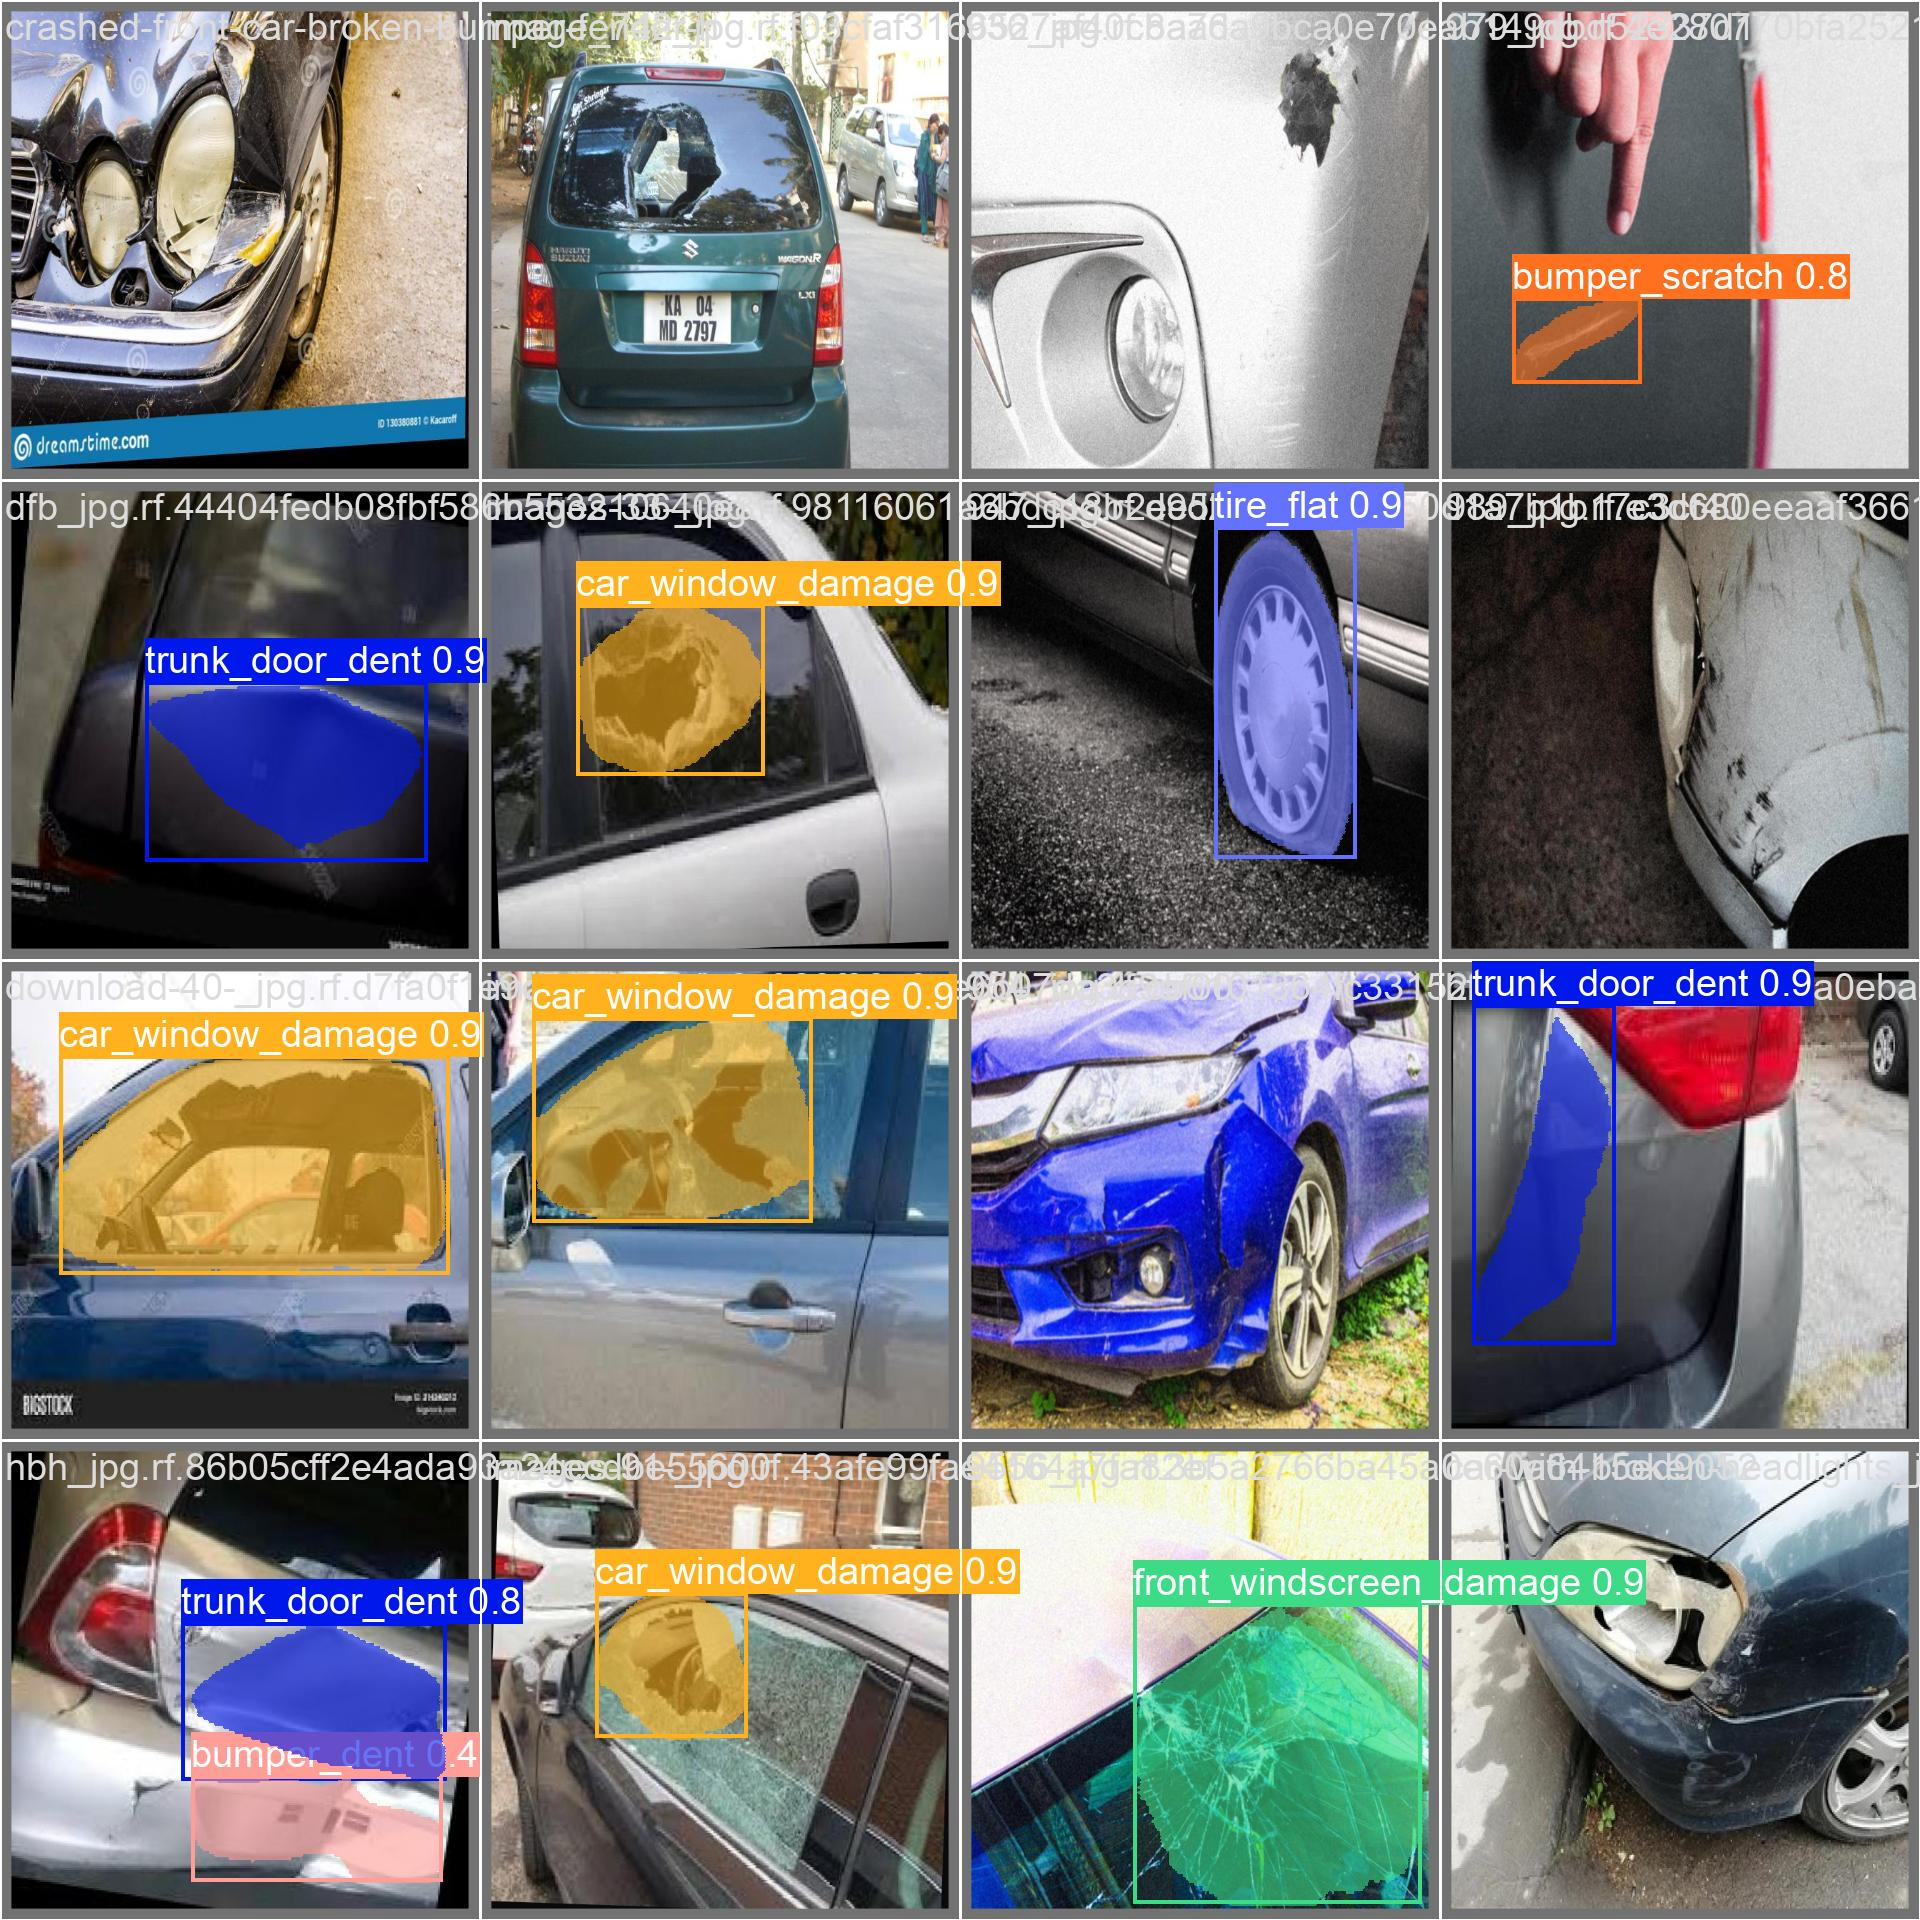

In [11]:
Image(filename=f'{HOME}/runs/segment/val/val_batch0_pred.jpg', width=600)

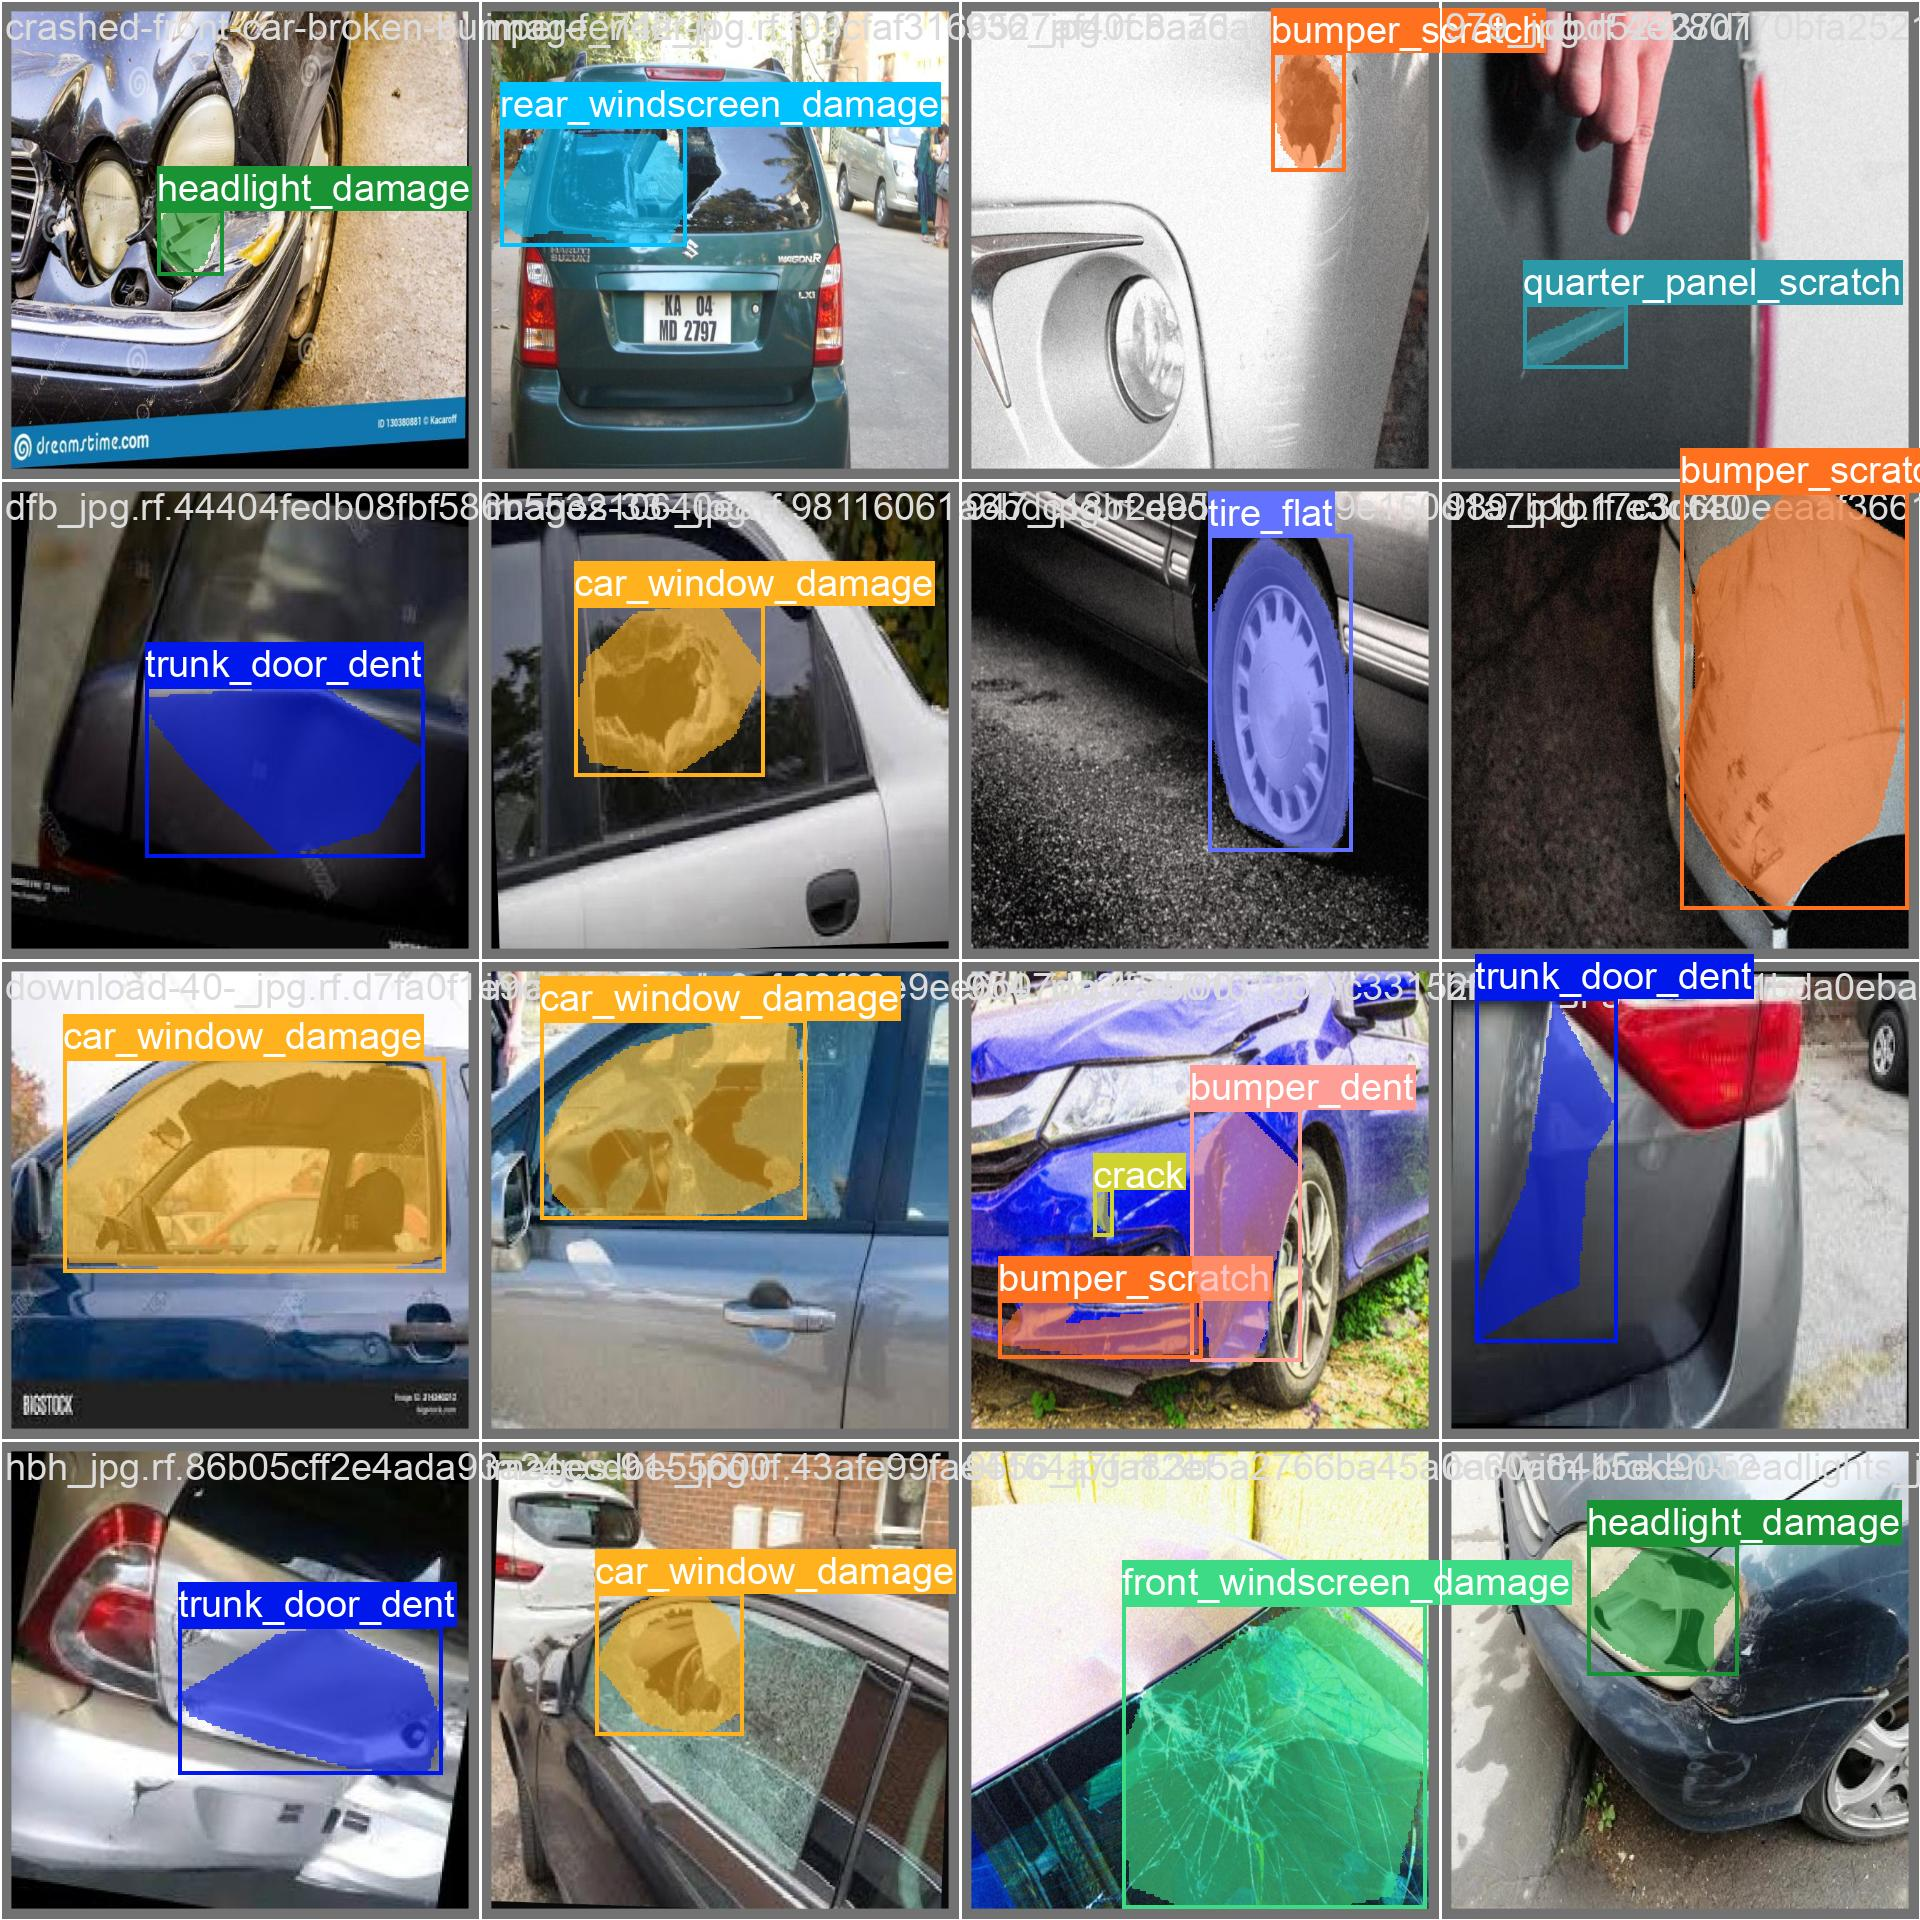

In [12]:
Image(filename=f'{HOME}/runs/segment/val/val_batch0_labels.jpg', width=600)

## Run Predict

In [13]:
# Load the trained model
model = YOLO(f'{HOME}/runs/segment/train16/weights/best.pt')

# Run predict
results = model.predict(
    source=f'{dataset.location}/test/images',
    conf=0.25, 
    save=True 
)


image 1/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/10068_jpg.rf.70fc2250674f7400b955b347add0c3c9.jpg: 640x640 1 rear_windscreen_damage, 11.2ms
image 2/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/100_jpg.rf.cd05dfec722da7d01d4e6a6933441f7b.jpg: 640x640 1 headlight_damage, 10.5ms
image 3/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/101_jpg.rf.b06d11be4d3187c1fefe2afaf2651d0c.jpg: 640x640 (no detections), 10.5ms
image 4/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/10509_jpg.rf.0479301de6c5a945f5c7363426525596.jpg: 640x640 1 trunk_door_dent, 10.5ms
image 5/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/10509_jpg.rf.e14fa4cf3b74d451316d994102ee9279.jpg: 640x640 1 trunk_door_dent, 10.5ms
image 6/368 /kaggle/working/datasets/car-damage-detect-2-1/test/images/10618_jpg.rf.8471adc81ec0229385fefa1b9e84a53d.jpg: 640x640 1 front_windscreen_damage, 10.5ms
image 7/368 /kaggle/working/datasets/car-damage-detec

/kaggle/working/runs/segment/predict/2_jpg.rf.cb503b6f5f5c00caffc4bcc5e2c612c8.jpg


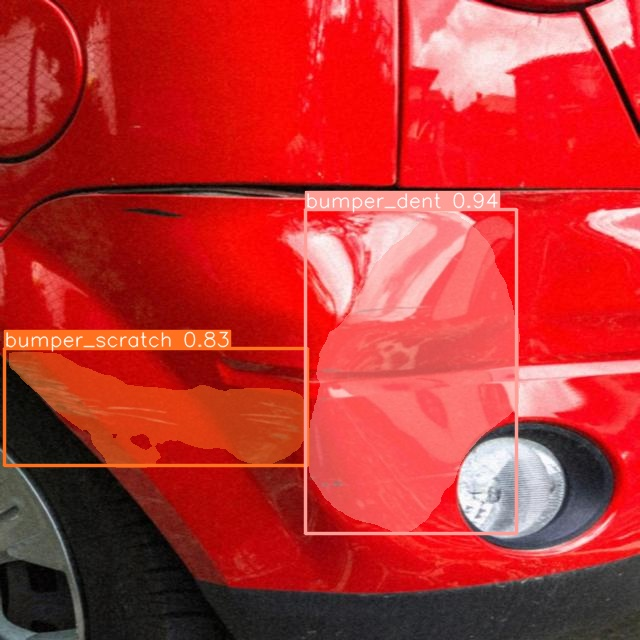



/kaggle/working/runs/segment/predict/5306_jpg.rf.2b8b914003707a1537243bd291f8b3c0.jpg


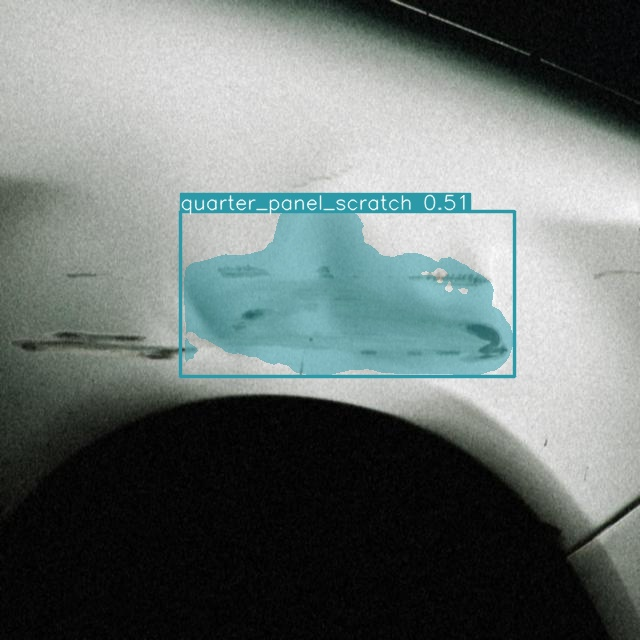



/kaggle/working/runs/segment/predict/5774_jpg.rf.6fc2a31abe55965d8ac10b0ba4d434ff.jpg


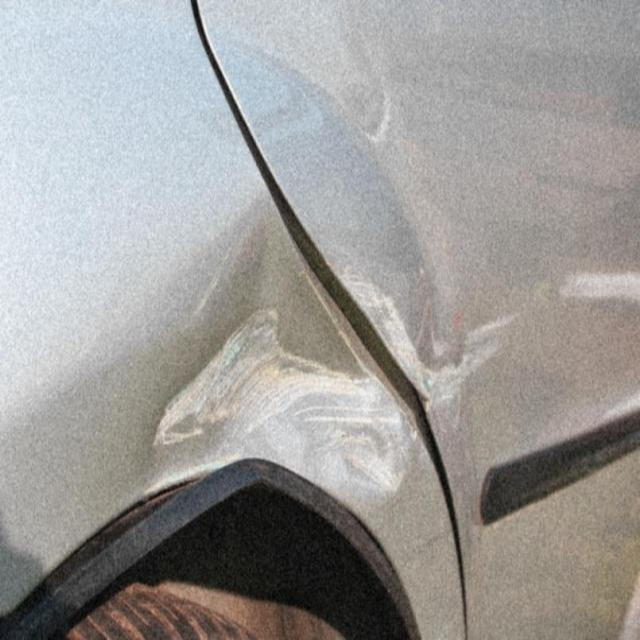



/kaggle/working/runs/segment/predict/9_jpg.rf.d2b79f70e8f3926128a2b685bcd1530f.jpg


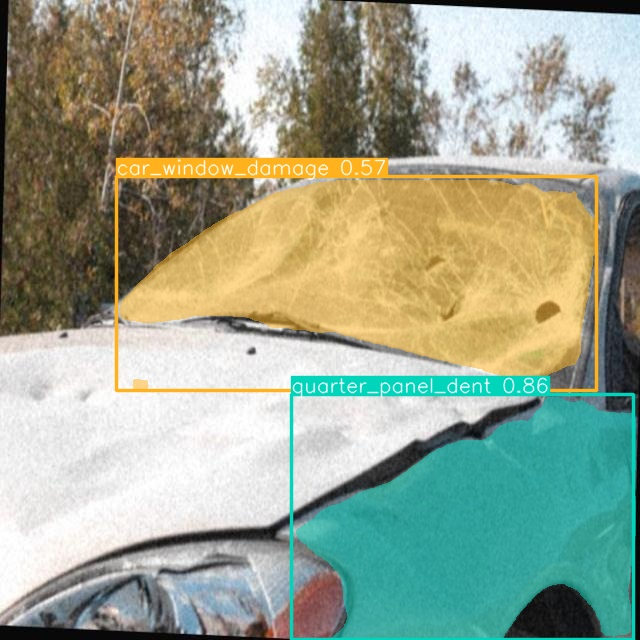



/kaggle/working/runs/segment/predict/339_jpg.rf.623671adac4eff1211e437c4aa429bbf.jpg


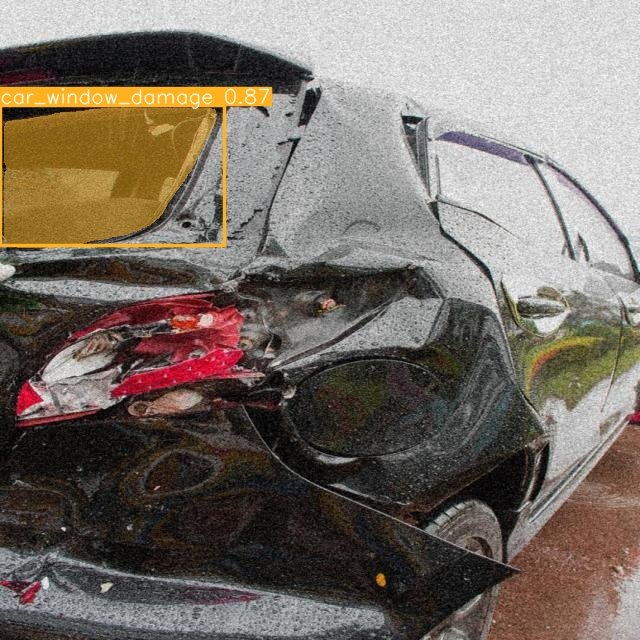



/kaggle/working/runs/segment/predict/8347_jpg.rf.ecef2563be9a51dfbca061b9599470bf.jpg


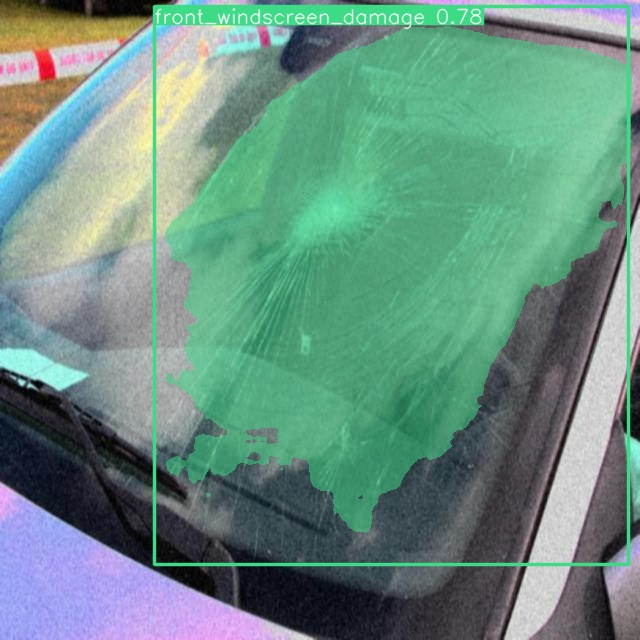



/kaggle/working/runs/segment/predict/5405_jpg.rf.757c8278c5834fb2f16fab986a4f87bc.jpg


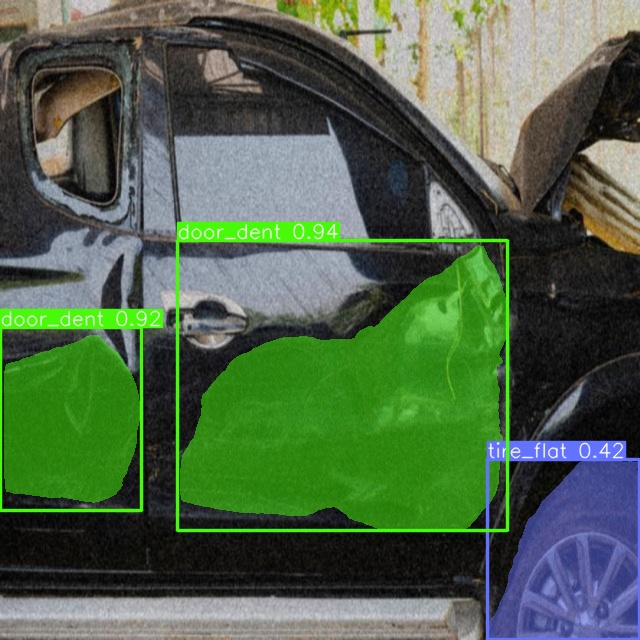



/kaggle/working/runs/segment/predict/7169_jpg.rf.f0a7f0451aff071e27c92bfd4bc5caf4.jpg


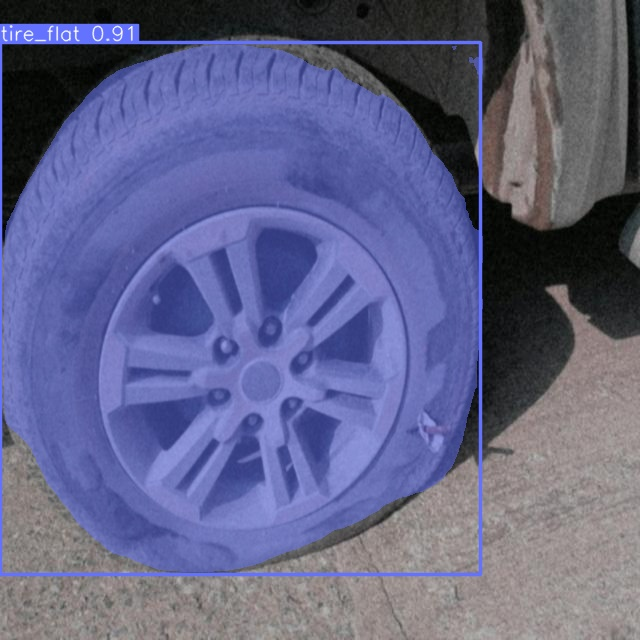



/kaggle/working/runs/segment/predict/6149_jpg.rf.2f913f0a1dd8f4aa74943ec4efa92ac3.jpg


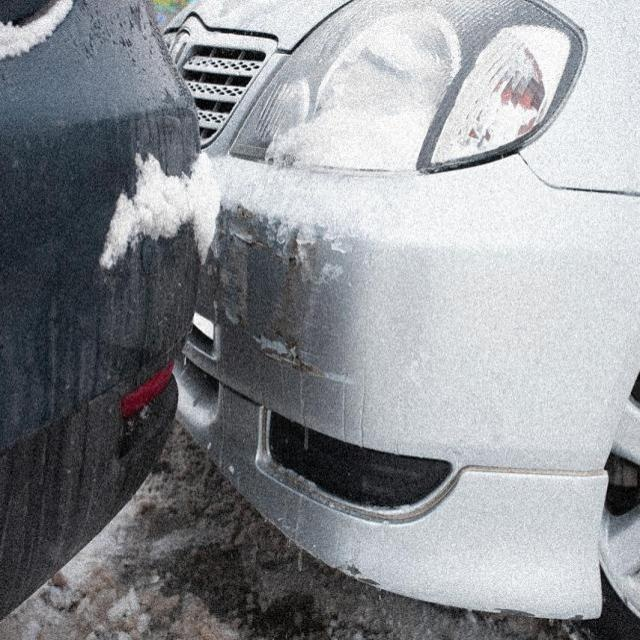



/kaggle/working/runs/segment/predict/2015_jpg.rf.e1115c35e98f73c07c9817149d43a8ad.jpg


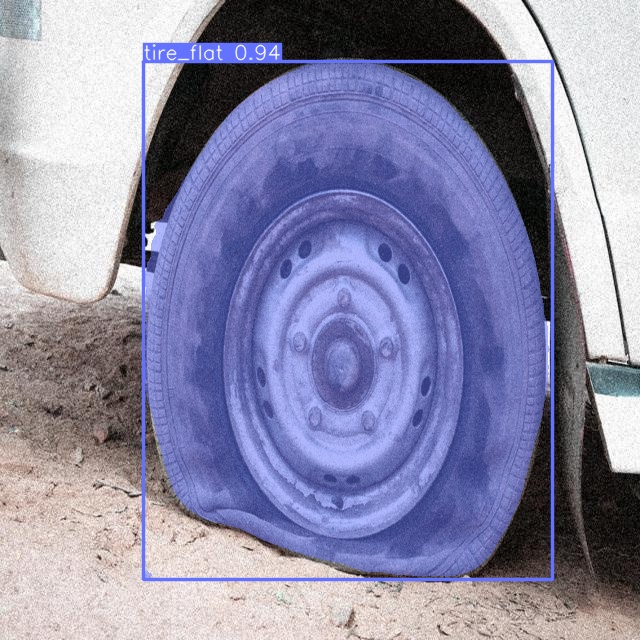

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:10]:
      print(image_path)  
      display(Image(filename=image_path, height=400))
      print("\n")

## Convert to ONNX Model

In [15]:
# Load the trained model
model = YOLO(f'{HOME}/runs/segment/train16/weights/best.pt')

# Export the model
model.export(format="onnx")

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv8s-seg summary (fused): 195 layers, 11785405 parameters, 0 gradients, 42.5 GFLOPs

PyTorch: starting from '/kaggle/working/runs/segment/train9/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 51, 8400), (1, 32, 160, 160)) (22.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 1.5s, saved as '/kaggle/working/runs/segment/train9/weights/best.onnx' (45.2 MB)

Export complete (4.1s)
Results saved to /kaggle/working/runs/segment/train9/weights
Predict:         yolo predict task=segment model=/kaggle/working/runs/segment/train9/weights/best.onnx imgsz=640  
Validate:        yolo val task=segment model=/kaggle/working/runs/segment/train9/weights/best.onnx imgsz=640 data=/kaggle/working/datasets/car-damage-detect-2-1/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/segment/train9/weights/best.onnx'

## Create the zip file of the runs folder
Note: manually download in the output section when the zip already created

In [16]:
import shutil
shutil.make_archive('/kaggle/working/runs', 'zip', '/kaggle/working/runs')

'/kaggle/working/runs.zip'